In [2]:
# make sure that rpy2 is installed
%load_ext rpy2.ipython

import warnings
from rpy2.rinterface import RRuntimeWarning

# ignore R warning messages
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [204]:
%%R -o counts -o geneinfo -o cellinfo 

# make sure that splatter is installed: https://github.com/Oshlack/splatter
library(splatter)

sim <- splatSimulate(nGenes = 2000,
                     batchCells = 500,
                     group.prob = c(0.50, 0.45, 0.05),
                     method = "groups",
                     de.prob = 0.4,     # controls the probability that a gene will be selected to be differentially expressed.
                     de.facLoc = 0.1,   # result in more or less extreme differences between groups.
                     de.facScale = 0.1,
                     out.prob = 0,       # no outliers
                     verbose = FALSE)
                     

counts     <- as.data.frame(t(counts(sim)))

cellinfo   <- as.data.frame(colData(sim))
geneinfo   <- as.data.frame(rowData(sim))


In [205]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import scipy as sp
import anndata
# from dca.api import dca, normalize

from sklearn.metrics import silhouette_score

sc.settings.set_figure_params(dpi=120)

In [206]:
sim_raw = sc.AnnData(counts.values, obs=cellinfo, var=geneinfo)
sim_raw.obs_names = cellinfo.Cell
sim_raw.var_names = geneinfo.Gene

# sc.pp.filter_genes(sim_raw, min_counts=1)
# sim_raw_norm = sim_raw.copy()
# sc.pp.normalize_total(sim_raw_norm)
# sc.pp.log1p(sim_raw_norm)
# sc.pp.pca(sim_raw_norm)


# print(dropout_gt[:10, :10])
obs = pd.DataFrame(sim_raw.obs).drop(columns="Cell")
var = pd.DataFrame(sim_raw.var).drop(columns='Gene')
sim_raw.obs = obs
sim_raw.var = var
print(sim_raw)
# print(sim_true)


AnnData object with n_obs × n_vars = 500 × 2000
    obs: 'Batch', 'Group', 'ExpLibSize'
    var: 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3'


In [207]:
sim_raw.write("./Dataset/Sim/sim_0.05.h5ad")

/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Batch' as categorical


/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Batch' as categorical


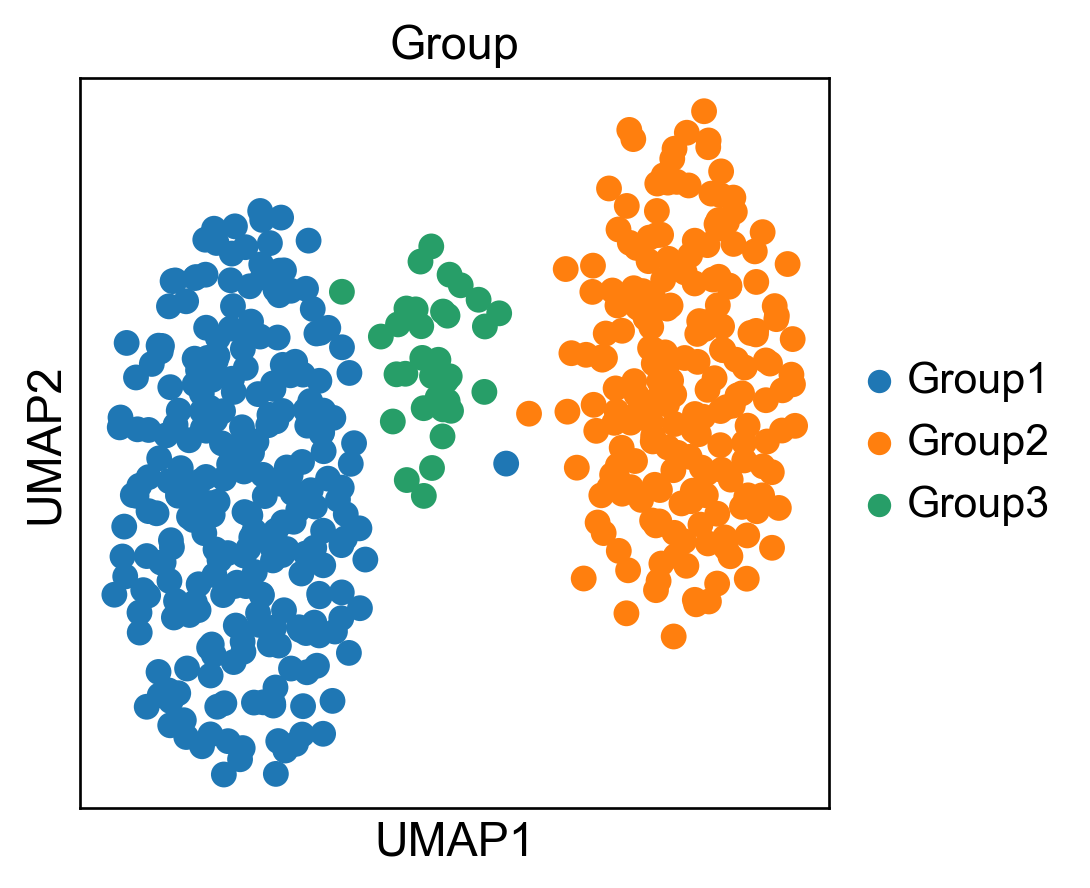

In [187]:
sc.pp.neighbors(sim_raw_norm)
sc.tl.umap(sim_raw_norm)
sc.pl.umap(sim_raw_norm, color='Group')